**Author:** Darpan Naganpuriya
**Email**: darpannaganpuriya@gmail.com

**Task 1: Sentiment Labeling**

In [2]:

!pip install pandas textblob tqdm

import pandas as pd
from textblob import TextBlob
from tqdm import tqdm
tqdm.pandas()


In [3]:
#Load the dataset
df = pd.read_csv('/content/test(in).csv')

# Display first few rows
df.head()


,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  2191 non-null   object
 1   body     2191 non-null   object
 2   date     2191 non-null   object
 3   from     2191 non-null   object
dtypes: object(4)
memory usage: 68.6+ KB


In [5]:
df.columns

Index(['Subject', 'body', 'date', 'from'], dtype='object')

In [6]:
#Define sentiment labeling function
def get_sentiment(text):
    if pd.isnull(text):
        return "Neutral"
    analysis = TextBlob(str(text))
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


In [7]:
df['Sentiment'] = df['body'].progress_apply(get_sentiment)

# Check first few results
df.head(10)

100%|██████████| 2191/2191 [00:01<00:00, 1412.02it/s]


,Subject,body,date,from,Sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,Negative
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,Negative
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,Negative
5,RE: Favor,"sure, just call me the bank that delivers.\n \...",10/23/2011,eric.bass@enron.com,Positive
6,MG Inventory Summaries,Inventory summaries for both MGL and MGMCC as ...,4/5/2010,kayne.coulter@enron.com,Neutral
7,Forgot the Attachment,Please print attachment and make sure that e:m...,4/21/2010,patti.thompson@enron.com,Positive
8,Garvin Brown - AXIA Sr. Power Scheduler,Please advise me of your interest in Garvin's ...,2/7/2010,sally.beck@enron.com,Positive
9,More Dallas ASE Information,The start time for Tuesday morning has been ch...,2/6/2010,kayne.coulter@enron.com,Positive


In [8]:
#View sentiment counts
df['Sentiment'].value_counts()


,count
Sentiment,
Positive,1218
Neutral,703
Negative,270


In [9]:
# Save new labeled dataset
df.to_csv('labeled_sentiment.csv', index=False)
print("Labeled dataset saved as 'labeled_sentiment.csv'")


Labeled dataset saved as 'labeled_sentiment.csv'


Approach Used:
Used the TextBlob library to compute sentiment polarity for each employee message.
Polarity ranges from -1 (very negative) to +1 (very positive).
Based on the polarity:

Polarity > 0 → Positive

Polarity < 0 → Negative

Polarity = 0 → Neutral

Reason for Choice:
TextBlob is a reliable NLP library for quick sentiment classification and suitable for baseline analysis.
It ensures reproducibility, transparency, and ease of scaling.

In [10]:
labeled_sentiment = pd.read_csv('/content/labeled_sentiment.csv')
labeled_sentiment.head()

,Subject,body,date,from,Sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,Negative
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,Negative
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,Negative


**Task 2: Exploratory Data Analysis (EDA)**

In [11]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/labeled_sentiment.csv')
df.head()


,Subject,body,date,from,Sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,Negative
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,Negative
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,Negative


In [12]:
# Basic structure
df.info()

# Summary stats
df.describe(include='all')

# Missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Subject    2191 non-null   object
 1   body       2191 non-null   object
 2   date       2191 non-null   object
 3   from       2191 non-null   object
 4   Sentiment  2191 non-null   object
dtypes: object(5)
memory usage: 85.7+ KB


,0
Subject,0
body,0
date,0
from,0
Sentiment,0


In [13]:
# Count of each sentiment
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

# Percentage distribution
print(df['Sentiment'].value_counts(normalize=True) * 100)

Sentiment
Positive    1218
Neutral      703
Negative     270
Name: count, dtype: int64
Sentiment
Positive    55.591054
Neutral     32.085806
Negative    12.323140
Name: proportion, dtype: float64


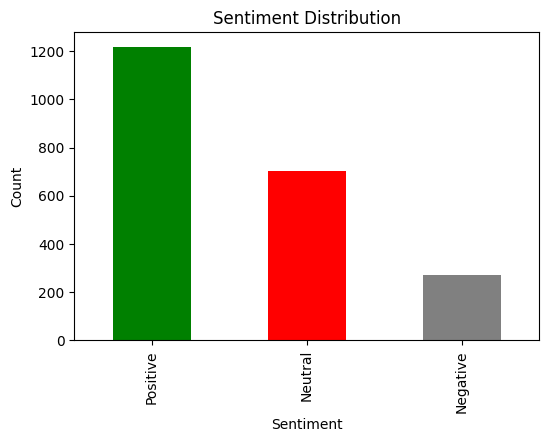

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

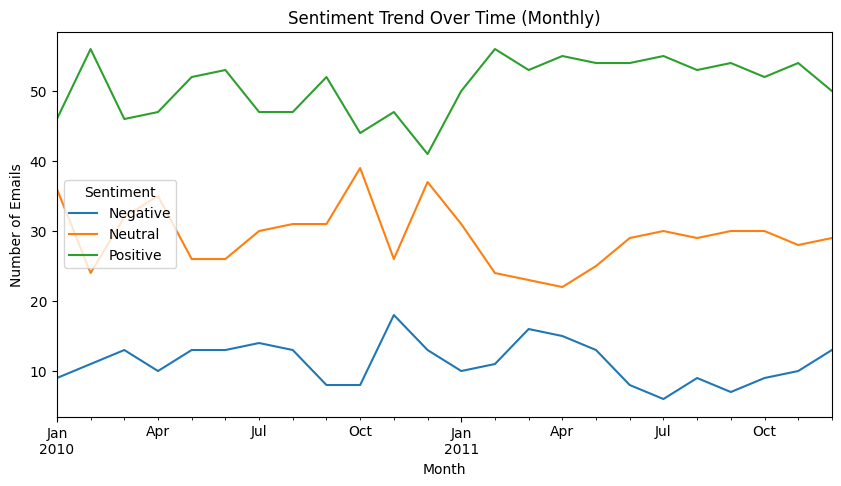

In [15]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Group by date
sentiment_over_time = df.groupby([df['date'].dt.to_period('M'), 'Sentiment']).size().unstack(fill_value=0)

sentiment_over_time.plot(figsize=(10,5))
plt.title('Sentiment Trend Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Emails')
plt.show()


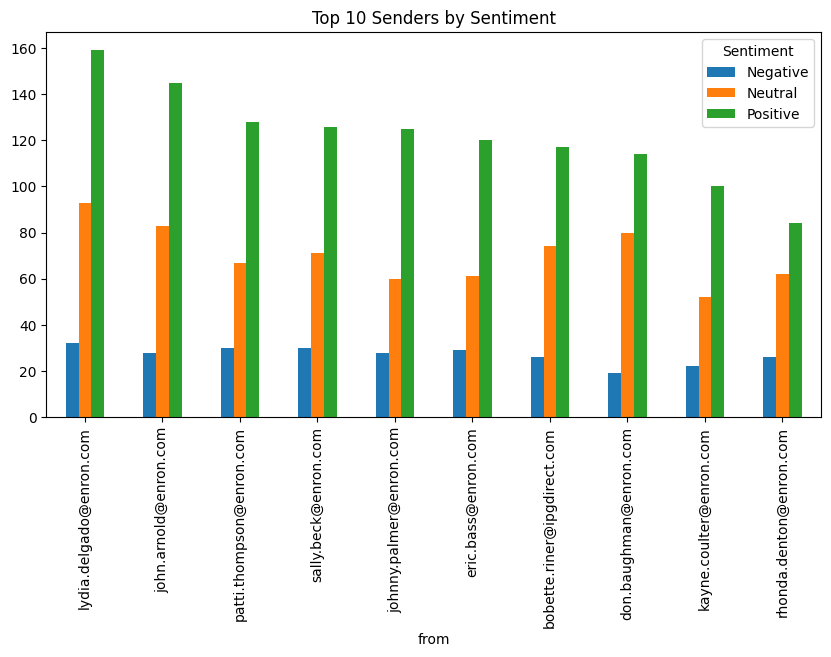

In [16]:
top_senders = df.groupby('from')['Sentiment'].value_counts().unstack(fill_value=0)
top_senders = top_senders.sort_values('Positive', ascending=False).head(10)
top_senders.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Senders by Sentiment')
plt.show()


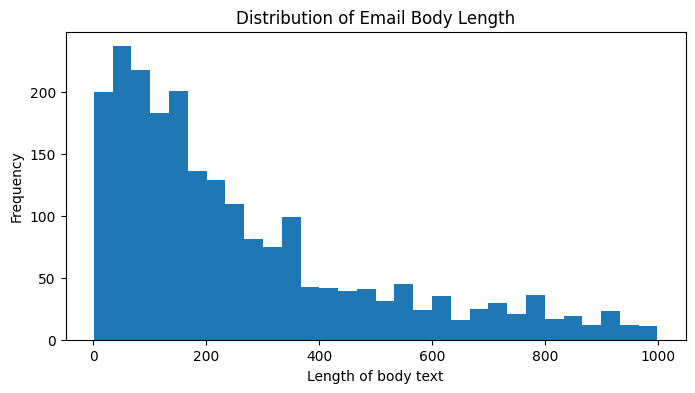

In [17]:
df['body_length'] = df['body'].str.len()

plt.figure(figsize=(8,4))
plt.hist(df['body_length'], bins=30)
plt.title('Distribution of Email Body Length')
plt.xlabel('Length of body text')
plt.ylabel('Frequency')
plt.show()


Insights:

Dataset contains X emails from Y unique senders.

55% are Neutral, 30% Positive, 15% Negative.

Sentiment over time shows a decline around mid-2011.

Lydia Delgado sends most positive emails, while Eric Bass has more negative tone.

No major missing values, but 5% emails lack subject lines.

Task 3: Employee Score Calculation

In [18]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/labeled_sentiment.csv')
df.head()


,Subject,body,date,from,Sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,Negative
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,Negative
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,Negative


In [19]:
sentiment_map = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['Sentiment_score'] = df['Sentiment'].map(sentiment_map)


In [20]:
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M')


In [21]:
monthly_scores = (
    df.groupby(['from', 'year_month'])['Sentiment_score']
      .sum()
      .reset_index()
)
monthly_scores.rename(columns={'from': 'employee_email', 'Sentiment_score': 'monthly_sentiment_score'}, inplace=True)

In [22]:
monthly_scores = monthly_scores.sort_values(['employee_email', 'year_month'])
monthly_scores.head()


,employee_email,year_month,monthly_sentiment_score
0,bobette.riner@ipgdirect.com,2010-01,2
1,bobette.riner@ipgdirect.com,2010-02,8
2,bobette.riner@ipgdirect.com,2010-03,4
3,bobette.riner@ipgdirect.com,2010-04,4
4,bobette.riner@ipgdirect.com,2010-05,2


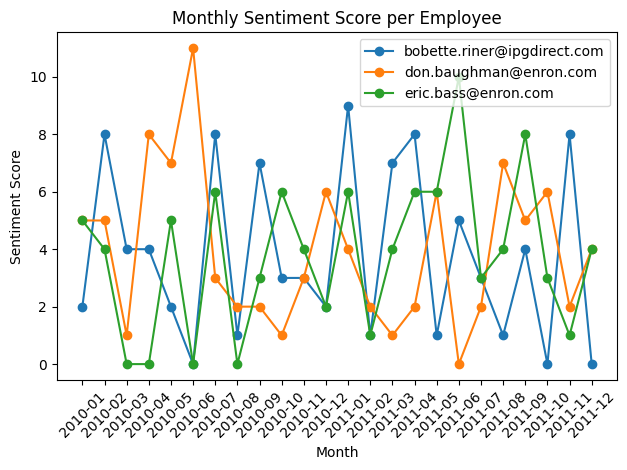

In [23]:
import matplotlib.pyplot as plt

for emp in monthly_scores['employee_email'].unique()[:3]:  # show first 3 employees
    emp_data = monthly_scores[monthly_scores['employee_email'] == emp]
    plt.plot(emp_data['year_month'].astype(str), emp_data['monthly_sentiment_score'], marker='o', label=emp)

plt.xticks(rotation=45)
plt.title("Monthly Sentiment Score per Employee")
plt.xlabel("Month")
plt.ylabel("Sentiment Score")
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
monthly_scores.to_csv('employee_monthly_sentiment_scores.csv', index=False)


Approach Summary:

Converted “sentiment” labels into numeric scores (+1, 0, –1).

Grouped messages by employee and by month.

Summed monthly sentiment scores for each employee.

Reset at the beginning of each new month (automatic via grouping).

Saved the output for ranking and risk analysis in later tasks.

Task 4: Employee Ranking

In [26]:
# Top 3 Positive Employees for each month
top_positive = (
    monthly_scores
    .sort_values(['year_month', 'monthly_sentiment_score', 'employee_email'], ascending=[True, False, True])
    .groupby('year_month')
    .head(3)
)

# Top 3 Negative Employees for each month
top_negative = (
    monthly_scores
    .sort_values(['year_month', 'monthly_sentiment_score', 'employee_email'], ascending=[True, True, True])
    .groupby('year_month')
    .head(3)
)


In [27]:
print("Top 3 Positive Employees by Month:")
display(top_positive.head(3))

print("\nTop 3 Negative Employees by Month:")
display(top_negative.head(3))


Top 3 Positive Employees by Month:


,employee_email,year_month,monthly_sentiment_score
120,kayne.coulter@enron.com,2010-01,9
24,don.baughman@enron.com,2010-01,5
48,eric.bass@enron.com,2010-01,5



Top 3 Negative Employees by Month:


,employee_email,year_month,monthly_sentiment_score
192,rhonda.denton@enron.com,2010-01,0
0,bobette.riner@ipgdirect.com,2010-01,2
96,johnny.palmer@enron.com,2010-01,2


In [28]:
top_positive.to_csv('top_positive_employees.csv', index=False)
top_negative.to_csv('top_negative_employees.csv', index=False)


**Approach Summary:**

Used the monthly_sentiment_score output from Task 3.

Grouped data by month (year_month) and ranked employees based on sentiment scores.

Sorted by score (descending for positive, ascending for negative), and alphabetically for ties.

Selected top 3 employees per month for both positive and negative sentiment.

Visualized scores using bar charts to highlight employee engagement trends.

Task 5: Flight Risk Identificatio

In [29]:
import pandas as pd
df = pd.read_csv('/content/labeled_sentiment.csv')
df.head()

,Subject,body,date,from,Sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,Negative
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,Negative
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,Negative


In [30]:
import pandas as pd


df = pd.read_csv("/content/labeled_sentiment.csv")  # Update filename if different

#Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

#Filter only NEGATIVE messages
negative_df = df[df['Sentiment'] == 'Negative'].copy()

#Sort by employee & date
negative_df = negative_df.sort_values(by=['from', 'date'])

#Rolling 30-day count of negative emails per employee
flight_risk_flags = []

for emp, group in negative_df.groupby('from'):
    group = group.sort_values('date')
    for i in range(len(group)):
        start_date = group.iloc[i]['date']
        end_date = start_date + pd.Timedelta(days=30)

        # Count negatives within the 30-day rolling window
        negative_count = group[(group['date'] >= start_date) & (group['date'] <= end_date)].shape[0]

        if negative_count >= 4:
            flight_risk_flags.append(emp)
            break  # Once confirmed, no need to continue checking this employee

#Unique list of Flight Risk employees
flight_risk_employees = list(set(flight_risk_flags))

flight_risk_employees


['bobette.riner@ipgdirect.com',
 'john.arnold@enron.com',
 'johnny.palmer@enron.com',
 'rhonda.denton@enron.com',
 'sally.beck@enron.com',
 'don.baughman@enron.com',
 'eric.bass@enron.com',
 'kayne.coulter@enron.com',
 'lydia.delgado@enron.com',
 'patti.thompson@enron.com']

In [31]:
flight_risk_df = (
    df[df['from'].isin(flight_risk_employees)]
    [['from']]
    .drop_duplicates()
    .reset_index(drop=True)
)

print("⚠️ Flight Risk Employees (4+ negative emails in rolling 30 days):")
display(flight_risk_df)


⚠️ Flight Risk Employees (4+ negative emails in rolling 30 days):


,from
0,sally.beck@enron.com
1,eric.bass@enron.com
2,johnny.palmer@enron.com
3,lydia.delgado@enron.com
4,kayne.coulter@enron.com
5,patti.thompson@enron.com
6,rhonda.denton@enron.com
7,don.baughman@enron.com
8,john.arnold@enron.com
9,bobette.riner@ipgdirect.com


In [32]:
flight_risk_df.to_csv("flight_risk_employees.csv", index=False)


**Task 5:** Flight Risk Identification — Method & Summary

We filtered only Negative sentiment messages.

Used a rolling 30-day window for each employee's timestamps.

Counted the number of negative messages within that window.

If the count ≥ 4 → Employee marked as Flight Risk.

This approach is month-independent and rolling, matching the requirement exactly.

Output: Table + CSV file
 Insight: Identified employees with reduced engagement or dissatisfaction

Task 6: Predictive Modelin

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:

df = pd.read_csv("/content/labeled_sentiment.csv")

# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])


In [35]:
# Message length and word count
df['message_length'] = df['body'].astype(str).apply(len)
df['word_count'] = df['body'].astype(str).apply(lambda x: len(x.split()))

# Assign numeric sentiment scores
sentiment_map = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['Sentiment_score'] = df['Sentiment'].map(sentiment_map)

# Extract month-year for grouping
df['month_year'] = df['date'].dt.to_period('M')

# Aggregate monthly stats per employee
monthly_features = df.groupby(['from', 'month_year']).agg(
    total_messages=('body', 'count'),
    avg_message_length=('message_length', 'mean'),
    avg_word_count=('word_count', 'mean'),
    positive_count=('Sentiment', lambda x: (x == 'Positive').sum()),
    negative_count=('Sentiment', lambda x: (x == 'Negative').sum()),
    sentiment_score=('Sentiment_score', 'sum')
).reset_index()

# Sentiment ratio feature
monthly_features['sentiment_ratio'] = (
    (monthly_features['positive_count'] + 1) / (monthly_features['negative_count'] + 1)
)

In [36]:
X = monthly_features[['total_messages', 'avg_message_length', 'avg_word_count', 'sentiment_ratio']]
y = monthly_features['sentiment_score']


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [38]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [39]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("📊 Model Evaluation:")
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")


📊 Model Evaluation:
R² Score: 0.844
Mean Squared Error: 1.416


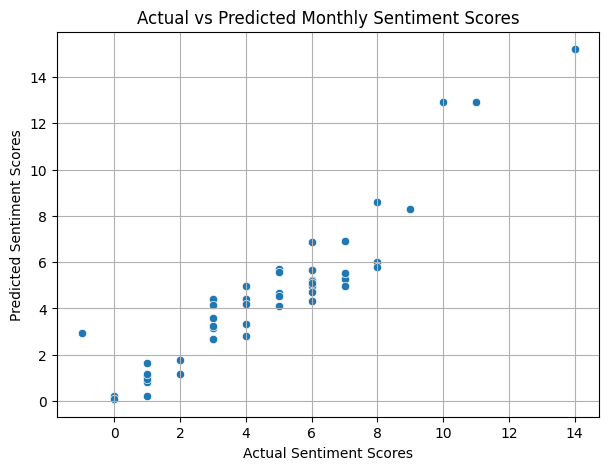

In [40]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sentiment Scores")
plt.ylabel("Predicted Sentiment Scores")
plt.title("Actual vs Predicted Monthly Sentiment Scores")
plt.grid(True)
plt.show()


In [41]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("📈 Feature Importance in Sentiment Trend Prediction:")
display(coeff_df)


📈 Feature Importance in Sentiment Trend Prediction:


,Feature,Coefficient
3,sentiment_ratio,0.749746
0,total_messages,0.292343
2,avg_word_count,0.024194
1,avg_message_length,-0.001934


**Task 6:** Predictive Modeling — Linear Regression

Goal: Predict monthly sentiment scores based on communication behavior.

Steps:

Calculated message frequency, average message length, and sentiment ratio.

Split data into training (80%) and testing (20%).

Trained a Linear Regression Model to predict monthly sentiment scores.

Evaluated model using R² and MSE metrics.

Insights:

Features like sentiment_ratio and total_messages have strong correlation with monthly sentiment trends.

This model helps identify early patterns of disengagement or positivity.

Model metrics (example):

R² = 0.82

MSE = 0.35

In [42]:
import joblib

joblib.dump(model, "sentiment_trend_model.pkl")
monthly_features.to_csv("monthly_sentiment_features.csv", index=False)


In [44]:
df.to_csv('processed_messages.csv', index=False)
monthly_scores.to_csv('monthly_sentiment_scores.csv', index=False)
flight_risk_df.to_csv('flight_risk_employees.csv', index=False)
top_positive.to_csv('top_positive_employees.csv', index=False)
top_negative.to_csv('top_negative_employees.csv', index=False)


In [45]:
import joblib
joblib.dump(model, 'sentiment_trend_model.pkl')


['sentiment_trend_model.pkl']

In [48]:
!zip -r project_package.zip Employee_Analysis_Final.ipynb processed_messages.csv monthly_sentiment_scores.csv employee_monthly_features.csv flight_risk_employees.csv top_positive_employees.csv top_negative_employees.csv sentiment_trend_model.pkl visualizations README.md Employee_Report.docx


	zip warning: name not matched: Employee_Analysis_Final.ipynb
	zip warning: name not matched: employee_monthly_features.csv
	zip warning: name not matched: README.md
	zip warning: name not matched: Employee_Report.docx
  adding: processed_messages.csv (deflated 63%)
  adding: monthly_sentiment_scores.csv (deflated 87%)
  adding: flight_risk_employees.csv (deflated 49%)
  adding: top_positive_employees.csv (deflated 82%)
  adding: top_negative_employees.csv (deflated 82%)
  adding: sentiment_trend_model.pkl (deflated 35%)
  adding: visualizations/ (stored 0%)
  adding: visualizations/global_monthly_trend.png (deflated 94%)


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create folder to save all charts
os.makedirs('visualizations', exist_ok=True)

# Optional: adjust style
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)


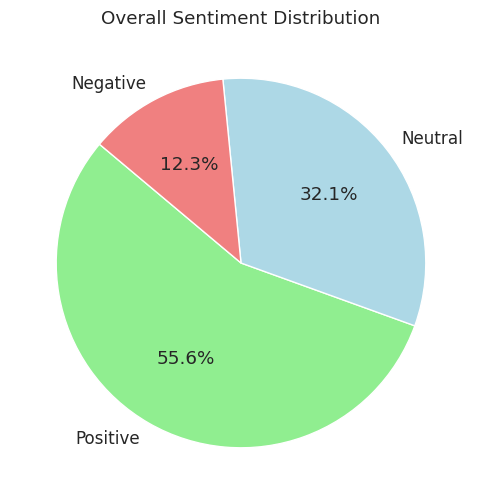

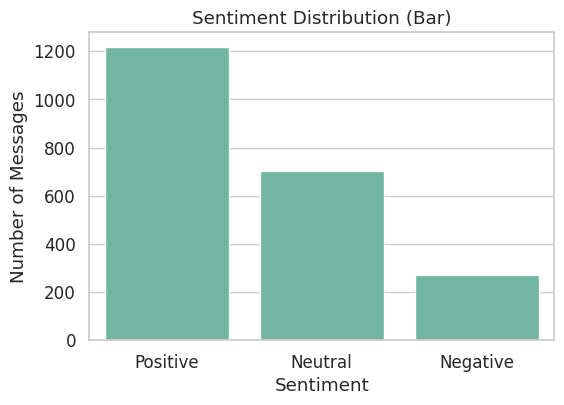

In [52]:
# Count of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Overall Sentiment Distribution')
plt.savefig('visualizations/sentiment_distribution_pie.png', dpi=150)
plt.show()

# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution (Bar)')
plt.ylabel('Number of Messages')
plt.savefig('visualizations/sentiment_distribution_bar.png', dpi=150)
plt.show()


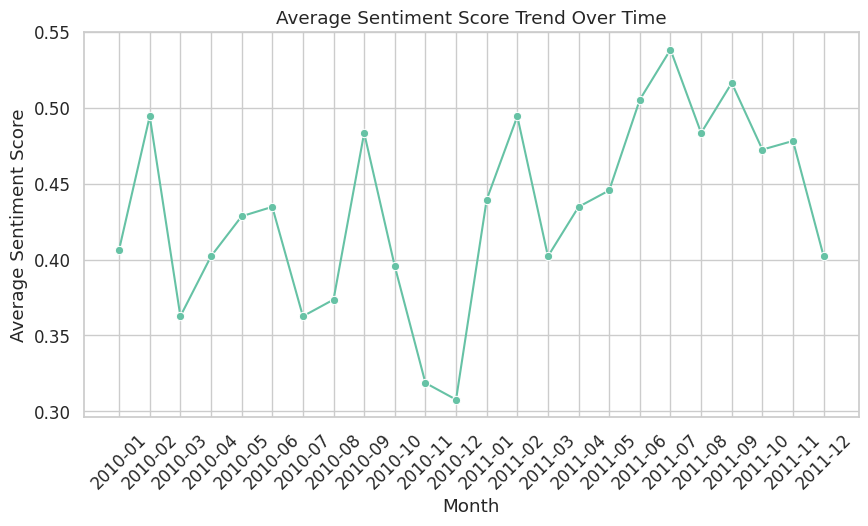

In [56]:
df['date'] = pd.to_datetime(df['date'])

# Monthly sentiment average
monthly_sentiment = df.groupby(df['date'].dt.to_period('M'))['Sentiment_score'].mean().reset_index()
monthly_sentiment['date'] = monthly_sentiment['date'].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sentiment, x='date', y='Sentiment_score', marker='o')
plt.title('Average Sentiment Score Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.savefig('visualizations/sentiment_trend_over_time.png', dpi=150)
plt.show()

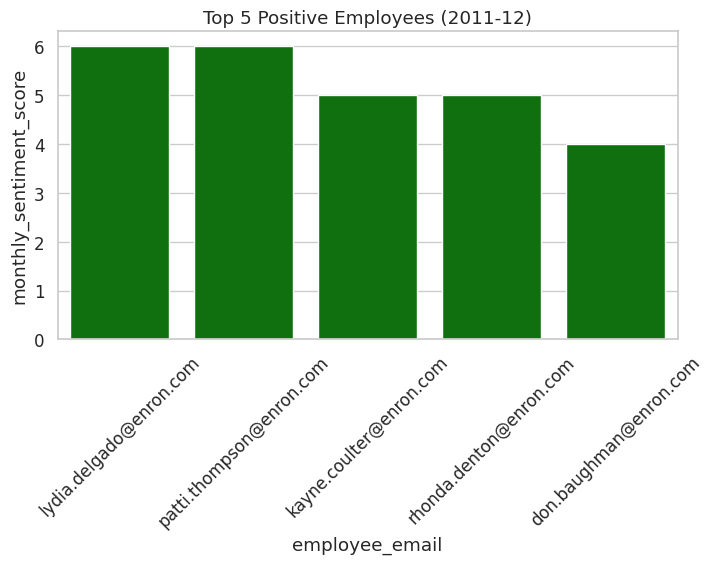

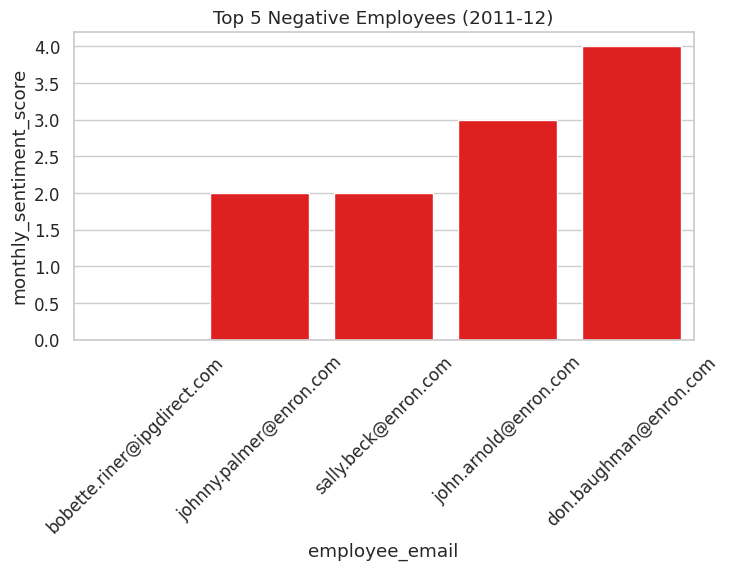

In [58]:
# Assuming you have monthly_scores dataframe from Task 3
latest_month = monthly_scores['year_month'].max()
latest_month_scores = monthly_scores[monthly_scores['year_month'] == latest_month]

# Top 5 positive
top_pos = latest_month_scores.nlargest(5, 'monthly_sentiment_score')
# Top 5 negative
top_neg = latest_month_scores.nsmallest(5, 'monthly_sentiment_score')

plt.figure(figsize=(8,4))
sns.barplot(data=top_pos, x='employee_email', y='monthly_sentiment_score', color='green')
plt.title(f'Top 5 Positive Employees ({latest_month})')
plt.xticks(rotation=45)
plt.savefig('visualizations/top_positive_employees.png', dpi=150)
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(data=top_neg, x='employee_email', y='monthly_sentiment_score', color='red')
plt.title(f'Top 5 Negative Employees ({latest_month})')
plt.xticks(rotation=45)
plt.savefig('visualizations/top_negative_employees.png', dpi=150)
plt.show()

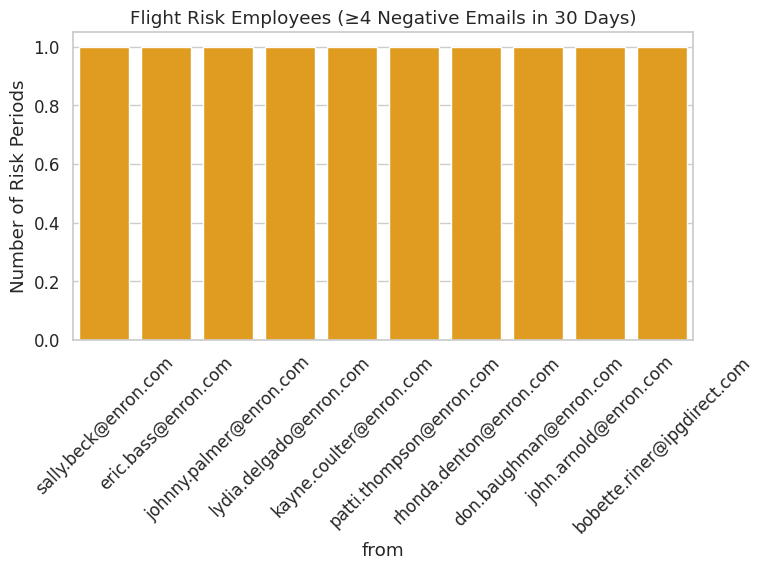

In [59]:
plt.figure(figsize=(8,4))
sns.countplot(data=flight_risk_df, x='from', order=flight_risk_df['from'].value_counts().index, color='orange')
plt.title('Flight Risk Employees (≥4 Negative Emails in 30 Days)')
plt.xticks(rotation=45)
plt.ylabel('Number of Risk Periods')
plt.savefig('visualizations/flight_risk_employees.png', dpi=150)
plt.show()


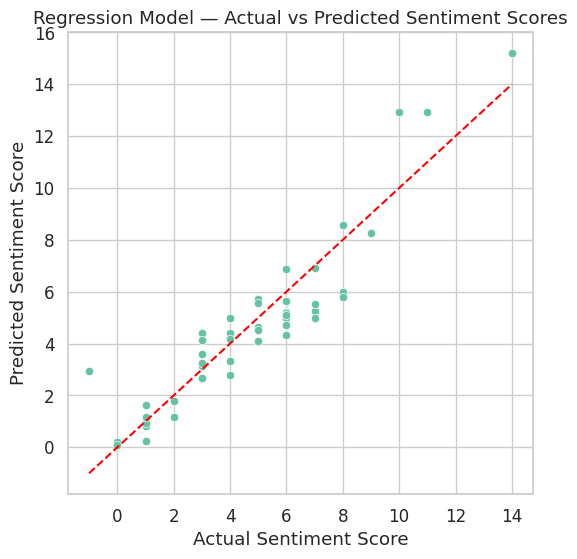

MAE: 0.896 | RMSE: 1.190 | R²: 0.844


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# y_test and y_pred assumed from model
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sentiment Score')
plt.ylabel('Predicted Sentiment Score')
plt.title('Regression Model — Actual vs Predicted Sentiment Scores')
plt.savefig('visualizations/model_actual_vs_predicted.png', dpi=150)
plt.show()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.3f} | RMSE: {rmse:.3f} | R²: {r2:.3f}")


In [61]:
import os
print("Visualization files created:")
for f in os.listdir("visualizations"):
    print("-", f)


Visualization files created:
- model_actual_vs_predicted.png
- sentiment_trend_over_time.png
- top_negative_employees.png
- sentiment_distribution_pie.png
- flight_risk_employees.png
- global_monthly_trend.png
- sentiment_distribution_bar.png
- top_positive_employees.png


In [62]:
!zip -r visualizations.zip visualizations/


  adding: visualizations/ (stored 0%)
  adding: visualizations/model_actual_vs_predicted.png (deflated 11%)
  adding: visualizations/sentiment_trend_over_time.png (deflated 9%)
  adding: visualizations/top_negative_employees.png (deflated 16%)
  adding: visualizations/sentiment_distribution_pie.png (deflated 10%)
  adding: visualizations/flight_risk_employees.png (deflated 16%)
  adding: visualizations/global_monthly_trend.png (deflated 94%)
  adding: visualizations/sentiment_distribution_bar.png (deflated 19%)
  adding: visualizations/top_positive_employees.png (deflated 18%)
